**<h1> <center> A Comparison of Employment in Canada Provinces by Industry</center></h1>**

**Member 1: Ashley Redman,** Contribution 100%. We, all team members, agree together that the above information is true, and we are confident about our contributions to this submitted project/final tutorial.

I did this project by myself, so I did 100% of it.

<h3><center>Spring 2024 Data Science Project </center></h3>


By: Ashley Redman

**<h3>Introduction</h3>**

Employment in all countries is constantly changing. Some years the rate rises, while some years it falls. The employment rate depends on a lot of different factors such as how good an industry is doing , how the country is doing economically, and more. It's important for a country to have a high employment rate because it dictates how much money the government will have to help its citizens. Typically, this means that the higher the employment rate, the higher citizens satifaction will be.


In this study, Canada is being used because it has a higher unemployment rate compared to other countries such as the United States and China. The goal of this study is to find out why this is. Are people in certain industries experiencing higher unemployment rates? Or is it people in certain provinces that are experiencing this? We will focus on answering these questions later in the analysis.

**<h3>Data Curation</h3>**

There are many different datasets that are able to be used on the Statistics Canada website (https://www.statcan.gc.ca/en/start). They have a lot of the same graphs separated by different constraints such as age, gender, location, and more.

For this project, I wanted a table that separated by industry and province. So I downloaded this file from the statcan website:


*   https://www150.statcan.gc.ca/n1/daily-quotidien/240209/t006a-eng.htm




All used imports:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy import stats
import numpy as np

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns

Here the csv gets imported as a dataframe and showing new dataframe. I had to use df.drop to remove last few rows that had notes about the data set and are irrelevant to the data I'm trying to manipulate

In [2]:
df = pd.read_csv('CMSC320_Final_Project.csv')
df.drop(df.tail(7).index, inplace = True)
display(df)

,Industry,December 2023 (Thousands),January 2024 (Thousands),Standard error{1} (Thousands),December 2023 to January 2024 (Change in Thousands),January 2023 to January 2024 (Change in Thousands),December 2023 to January 2024 (% change),January 2023 to January 2024 (% change)
0,Newfoundland and Labrador,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Total employed, all industries",238.0,245.5,2.1,7.5,10.6,3.2,4.5
2,Goods-producing sector,48.2,51.2,1.4,3.0,-0.7,6.2,-1.3
3,Agriculture,0.8,1.2,0.2,0.4,-0.1,50.0,-7.7
4,Natural resources,16.2,17.8,0.7,1.6,1.4,9.9,8.5
...,...,...,...,...,...,...,...,...
195,Health care and social assistance,398.8,397.2,4.9,-1.6,38.7,-0.4,10.8
196,"Information, culture and recreation",146.4,139.8,4.7,-6.6,-4.6,-4.5,-3.2
197,Accommodation and food services,183.9,182.4,5.0,-1.5,-14.3,-0.8,-7.3
198,Other services (except public administration),118.6,121.3,3.6,2.7,17.2,2.3,16.5


- The first column is the industry along with a row above saying for what
providence the industries are from.

- The second column is the number of individuals employed in December 2023 (in thousands).

- The third column is the number of people employed in January 2024 (in thousands).

- Both columns four and five calculate the change in thousands.

- Both columns six and seven take columns four and five and turn them into a percentage, so it's easier to read.

This code is being used to make a Location column by moving the location from the row that says the location. This makes it so the Location can be accessed by each row value.

In [3]:
arr = []
index = 20
for i in range(10):
  df_1 = pd.DataFrame(df.iloc[(index - 20):(index - 1),:])
  value = df_1.loc[(index - 20), 'Industry']
  df_1['Location'] = value
  df_1.drop(df_1.head(1).index, inplace = True)
  arr.append(df_1)
  index = index + 20

df_new = pd.concat(arr)
display(df_new)


,Industry,December 2023 (Thousands),January 2024 (Thousands),Standard error{1} (Thousands),December 2023 to January 2024 (Change in Thousands),January 2023 to January 2024 (Change in Thousands),December 2023 to January 2024 (% change),January 2023 to January 2024 (% change),Location
1,"Total employed, all industries",238.0,245.5,2.1,7.5,10.6,3.2,4.5,Newfoundland and Labrador
2,Goods-producing sector,48.2,51.2,1.4,3.0,-0.7,6.2,-1.3,Newfoundland and Labrador
3,Agriculture,0.8,1.2,0.2,0.4,-0.1,50.0,-7.7,Newfoundland and Labrador
4,Natural resources,16.2,17.8,0.7,1.6,1.4,9.9,8.5,Newfoundland and Labrador
5,Utilities,2.5,2.1,0.1,-0.4,-0.5,-16.0,-19.2,Newfoundland and Labrador
...,...,...,...,...,...,...,...,...,...
194,Educational services,215.3,217.5,4.4,2.2,6.4,1.0,3.0,British Columbia
195,Health care and social assistance,398.8,397.2,4.9,-1.6,38.7,-0.4,10.8,British Columbia
196,"Information, culture and recreation",146.4,139.8,4.7,-6.6,-4.6,-4.5,-3.2,British Columbia
197,Accommodation and food services,183.9,182.4,5.0,-1.5,-14.3,-0.8,-7.3,British Columbia


**<h3>Data Exploratory Analysis</h3>**

**Section 1:** Comparing total employed in each location in January 2024 (which location gets the
most workers) using a pie chart.

In [4]:
pie = df_new[df_new['Industry'] == 'Total employed, all industries']
df_new[df_new['Industry'] == 'Total employed, all industries'].iloc[:, 2].sum()
display(pie)

,Industry,December 2023 (Thousands),January 2024 (Thousands),Standard error{1} (Thousands),December 2023 to January 2024 (Change in Thousands),January 2023 to January 2024 (Change in Thousands),December 2023 to January 2024 (% change),January 2023 to January 2024 (% change),Location
1,"Total employed, all industries",238.0,245.5,2.1,7.5,10.6,3.2,4.5,Newfoundland and Labrador
21,"Total employed, all industries",91.9,92.0,0.9,0.1,7.5,0.1,8.9,Prince Edward Island
41,"Total employed, all industries",507.9,511.6,3.0,3.7,12.9,0.7,2.6,Nova Scotia
61,"Total employed, all industries",390.8,392.1,2.4,1.3,12.4,0.3,3.3,New Brunswick
81,"Total employed, all industries",4531.9,4524.4,16.7,-7.5,19.8,-0.2,0.4,Quebec
101,"Total employed, all industries",7913.9,7937.7,20.8,23.8,85.9,0.3,1.1,Ontario
121,"Total employed, all industries",703.1,710.0,3.2,6.9,26.6,1.0,3.9,Manitoba
141,"Total employed, all industries",607.0,600.8,3.0,-6.2,13.7,-1.0,2.3,Saskatchewan
161,"Total employed, all industries",2502.6,2512.7,11.8,10.1,84.8,0.4,3.5,Alberta
181,"Total employed, all industries",2837.9,2835.3,11.1,-2.6,70.9,-0.1,2.6,British Columbia


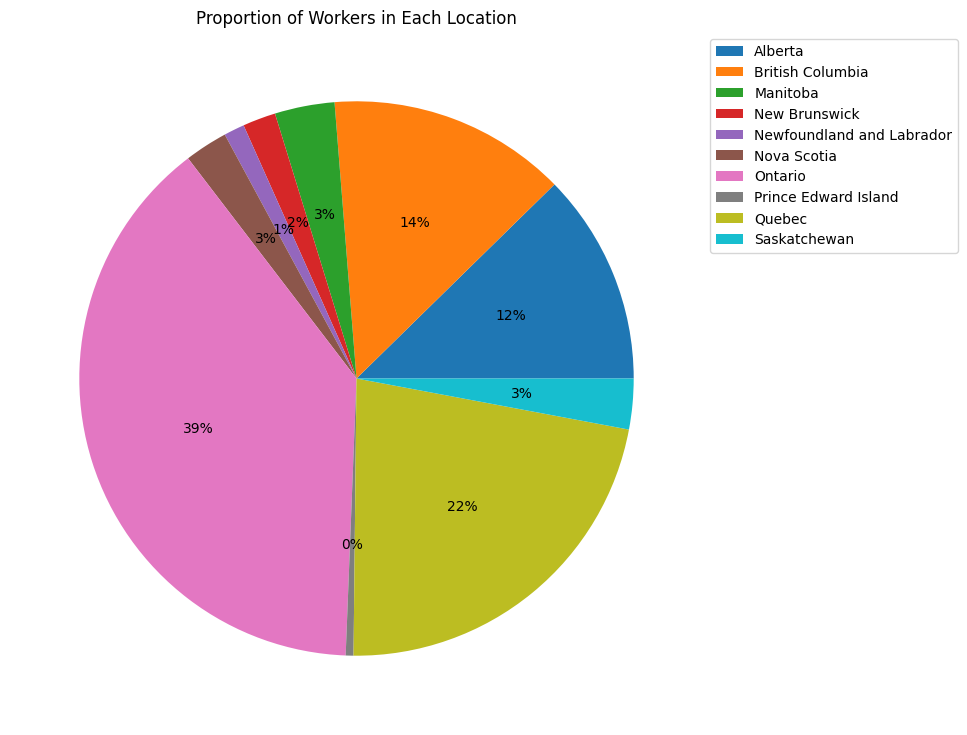

In [5]:
pie.groupby(['Location']).sum().plot(kind='pie', y='January 2024 (Thousands)',  autopct='%1.0f%%', figsize=(9, 9), labels = None)
plt.legend(['Alberta', 'British Columbia','Manitoba', 'New Brunswick', 'Newfoundland and Labrador', 'Nova Scotia', 'Ontario', 'Prince Edward Island', 'Quebec', 'Saskatchewan'], bbox_to_anchor=(1.0, 1.0))
plt.title('Proportion of Workers in Each Location')
plt.ylabel(None)
plt.show()

**Conclusion For Section 1:** From this pie chart, we can see that the proportion of workers in each location is centralized in certain locations. For example, Ontario has 39% of all people employed in Canada, while a place like Manitoba only has 3% of the employed population. This means that when doing further analysis of this dataset, we must take into consideration that some datasets are large, while others are small.







---



---



---



---



---



















**Section 2:** Check if Location correlates to % change from January 2023 - 2024

In [6]:
# Gathers the mean of all locations for total employed

new_lab = df_new[(df_new['Location'] == 'Newfoundland and Labrador') & (df_new['Industry'] != 'Total employed, all industries')].iloc[:, 7].mean()
prince = df_new[(df_new['Location'] == 'Prince Edward Island') & (df_new['Industry'] != 'Total employed, all industries')].iloc[:, 7].mean()
nova = df_new[(df_new['Location'] == 'Nova Scotia') & (df_new['Industry'] != 'Total employed, all industries')].iloc[:, 7].mean()
brunswick = df_new[(df_new['Location'] == 'New Brunswick') & (df_new['Industry'] != 'Total employed, all industries')].iloc[:, 7].mean()
quebec = df_new[(df_new['Location'] == 'Quebec') & (df_new['Industry'] != 'Total employed, all industries')].iloc[:, 7].mean()
ontario = df_new[(df_new['Location'] == 'Ontario') & (df_new['Industry'] != 'Total employed, all industries')].iloc[:, 7].mean()
manitoba = df_new[(df_new['Location'] == 'Manitoba') & (df_new['Industry'] != 'Total employed, all industries')].iloc[:, 7].mean()
sas = df_new[(df_new['Location'] == 'Saskatchewan') & (df_new['Industry'] != 'Total employed, all industries')].iloc[:, 7].mean()
alberta = df_new[(df_new['Location'] == 'Alberta') & (df_new['Industry'] != 'Total employed, all industries')].iloc[:, 7].mean()
bricol = df_new[(df_new['Location'] == 'British Columbia') & (df_new['Industry'] != 'Total employed, all industries')].iloc[:, 7].mean()

Text(0.5, 1.0, 'Average Change of Workers in Each Location For All Industries From 2023-2024')

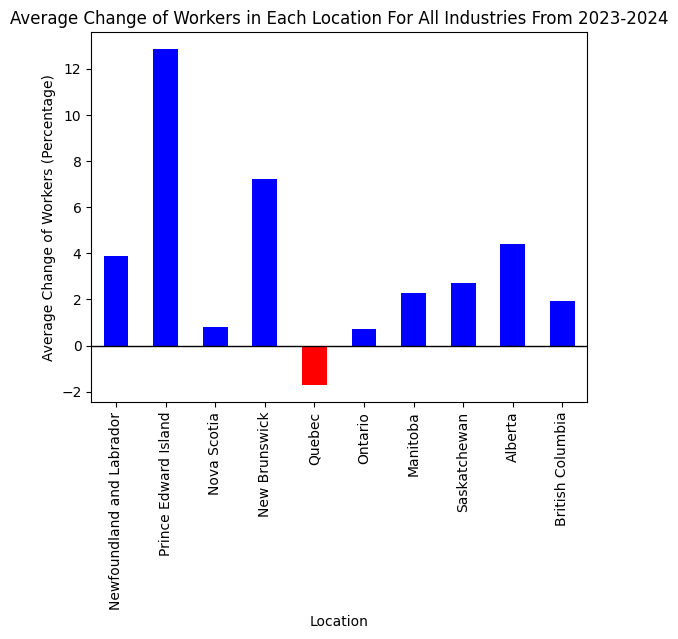

In [7]:
# Creates bar graph

locations = ['Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia',
       'New Brunswick', 'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan',
       'Alberta', 'British Columbia']
data = [['Newfoundland and Labrador', new_lab], ['Prince Edward Island', prince], ['Nova Scotia', nova], ['New Brunswick', brunswick], ['Quebec', quebec], ['Ontario', ontario], ['Manitoba', manitoba], ['Saskatchewan', sas], ['Alberta', alberta], ['British Columbia', bricol]]
avg = [new_lab, prince, nova, brunswick, quebec, ontario, manitoba, sas, alberta, bricol]

temp = pd.DataFrame(data,
                  columns = ['Location', 'Avg'])

graph = temp.plot.bar(x = 'Location', y = 'Avg', color = ['blue', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'blue'], legend=False)
plt.axhline(y=0,linewidth=1, color='k')
graph.set_ylabel("Average Change of Workers (Percentage)")
plt.title("Average Change of Workers in Each Location For All Industries From 2023-2024")






**Conclusion For Section 2:** This graph shows the average change of workers from January 2023 to January 2024. As we can see from this graph, Prince Edward Island has the greatest percentage of change, and Quebec has the lowest percentage of change by being in the negatives. This probably means that Prince Edward Island has been employing more people, while Quebec has been employing less people. However, we also have to take into consideration the amount of people in each location. When we do that we see that Prince Edward Island has significantly less people than Quebec does. In order to compare locations, we should compare locations that have a similar amount of people like Alberta and British Columbia.



---

---



---





---



---



**Section 3:** Using a T-test to figure out if there is a significant difference in the amount of people working in Alberta and British Columbia in January 2024. (Because they are similar in population)

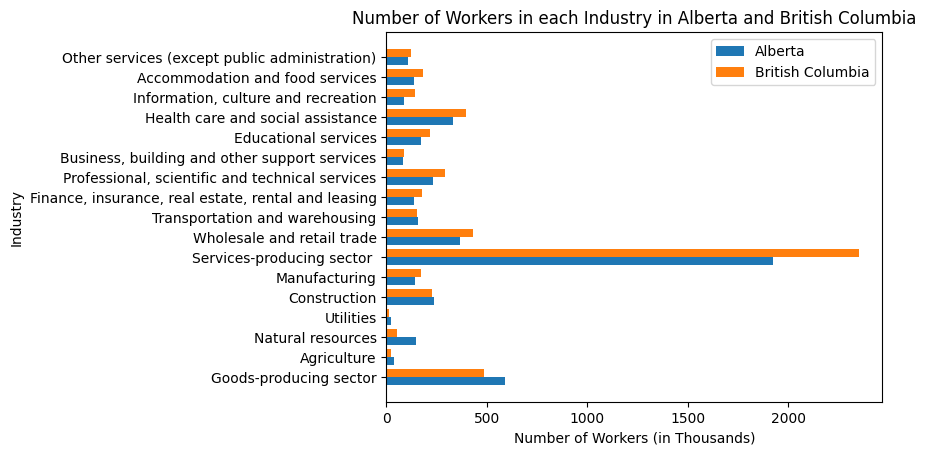

In [8]:

group_Que = df_new[(df_new['Industry'] != 'Total employed, all industries') & (df_new['Location'] == 'Alberta')]['January 2024 (Thousands)'].tolist()
group_PEI = df_new[(df_new['Industry'] != 'Total employed, all industries') & (df_new['Location'] == 'British Columbia')]['January 2024 (Thousands)'].tolist()


X_axis = np.arange(17)

plt.barh( X_axis - 0.2, group_Que , 0.4, label = 'Alberta')
plt.barh(X_axis + 0.2, group_PEI , 0.4, label = 'British Columbia')

df_new[(df_new['Industry'] != 'Total employed, all industries') & (df_new['Location'] == 'British Columbia')]['Industry'].tolist()

X = df_new[(df_new['Industry'] != 'Total employed, all industries') & (df_new['Location'] == 'British Columbia')]['Industry'].tolist()



plt.yticks(X_axis, X)
plt.xlabel("Number of Workers (in Thousands)")
plt.ylabel("Industry")
plt.title("Number of Workers in each Industry in Alberta and British Columbia")
plt.legend()
plt.show()







This graph shows the number of workers in each industry in Alberta and British Columbia. They both have similar amounts of workers in each sectors.

Next we will perform a t-test to find if the means are similar or different.

In [9]:
t_stat, p_value = stats.ttest_ind(group_Que, group_PEI, equal_var=False)

print(p_value)

0.8318103441267096


From this value, we can see that the means of the total amount of workers in Alberta and British Columbia are similar. This means that it's not statistically significant because the value is greater than 0.05.

**Conclusion For Section 3:** From this graph and two-sample t-test, we can go more in depth with the difference between the population in Alberta and British Columbia. We chose these two locations because they had a similar population, so they are comparable. We found that in each industry, they have a similar amount of workers in each one. By doing the t-test, we found that the means are similar and it's not statistically significant.

**Overall Conclusion:** From all three of these graphs, we can see the difference population can make on datasets that record employment. From section 1, we look at how spread out the employed population of Canada is. We can see that the majority of the population is concentrated in a few different locations (Quebec, Ontario, British Columbia, and Alberta). From section 2, we can see that the locations that have more people in them see a less percentage of change of employed individuals from 2023 to 2024. Meanwhile, the smaller areas have a greater percentage of change. In section 3, we explore specific populations (Alberta and British Columbia) because they are similar in population. Through this, we go more in depth and separate each population by industry. We found that they both have similar amounts of workers in each industry. This is futher concluded by the t-test because the test was found to be statistically insignificant because the resulting p-value was 0.831 > 0.05. This could be from the similar location in Canada these two regions are (they're right next to each other). They also have a similar topographical composition which can influence which types of jobs are in each location.

**<h3>Primary Analysis</h3>**

In this section, we will be making a machine learning algorithm that predicts how the location relates to percent change.

I am using all industries, so I have more data points. This means I leave out the total employed, but include all others. The machine learning method I'm using is clustering. For this section, I used some resources to help me like these:
*   https://realpython.com/k-means-clustering-python/
*   https://seaborn.pydata.org/generated/seaborn.scatterplot.html

The first one is a great resource for learning how to do k-means clustering algorithms. It's good for both beginners and advanced learners. The second is a resource for using seaborn scatterplots. I used this in the Visualization section and it helped a lot.



In [22]:
# Start by making a new dataframe that only has the required numbers. That being percent change from Jan 2023 to Jan 2024 and location.
df_new2 = pd.DataFrame()

df_new2['January 2024'] = df_new[(df_new['Industry'] != 'Total employed, all industries')]['January 2023 to January 2024 (% change)']
df_new2['Location'] = df_new[(df_new['Industry'] != 'Total employed, all industries')]['Location']


# Next step is to use an encoder. I used label encoding because it is simpler than one hot encoding. If I used one hot encoding, the machine learning algorithm would've been more complicated with too many dimensions.
le = LabelEncoder()
encoded_data = le.fit_transform(df_new2['Location'].tolist())
true_labels = df_new2['Location'].tolist()


# In this step I use zip to pit together the two arrays. One array has the encoded locations and the other has the percent change.
features = np.array(list(zip(df_new2['January 2024'].tolist(), encoded_data)))

# I make the number of clusters equal to the number of locations.
n_clusters = 10

# This is where I make the pipeline in order to make clusters. The scaler I use is min-max so I can fit all numbers into a specific range
preprocessor = Pipeline(
   [
      ("scaler", MinMaxScaler()),
      ("pca", PCA(n_components=2, random_state=42)),
   ]
  )

# Since I'm using clutering, I have to have a kmeans so for this I picked random values for everything except n_clusters. I picked random state 42 because that's the default value.
cluster = Pipeline(
       [
           (
               "kmeans",
               KMeans(
                   n_clusters=n_clusters,
                   init="k-means++",
                   n_init=50,
                   max_iter=500,
                   random_state=42,
               ),
           ),
       ]
    )


pipe = Pipeline(
   [
      ("preprocessor", preprocessor),
      ("cluster", cluster)
   ]
)

#fitting the pipe with features
pipe.fit(features)

# Creating a new dataframe that uses the pipe, features, kmeans, and labels
dff = pd.DataFrame(
    pipe["preprocessor"].transform(features),
    columns=["Encoded Location", "% Change"]
)

dff["Predicted"] = pipe["cluster"]["kmeans"].labels_
dff["True Label"] = le.inverse_transform(encoded_data)




**<h3>Visualizations</h3>**

This graph was used to show what the algorithm predicted and what it predicted. The numbers correspond to encoded values.


*   0 = Alberta
*   1 = British Columbia
*   2 = Manitoba
*   3 = New Brunswick
*   4 = Newfoundland and Labrador
*   5 = Nova Scotia
*   6 = Ontario
*   7 = Prince Edward Island
*   8 = Quebec
*   9 = Saskatchewan











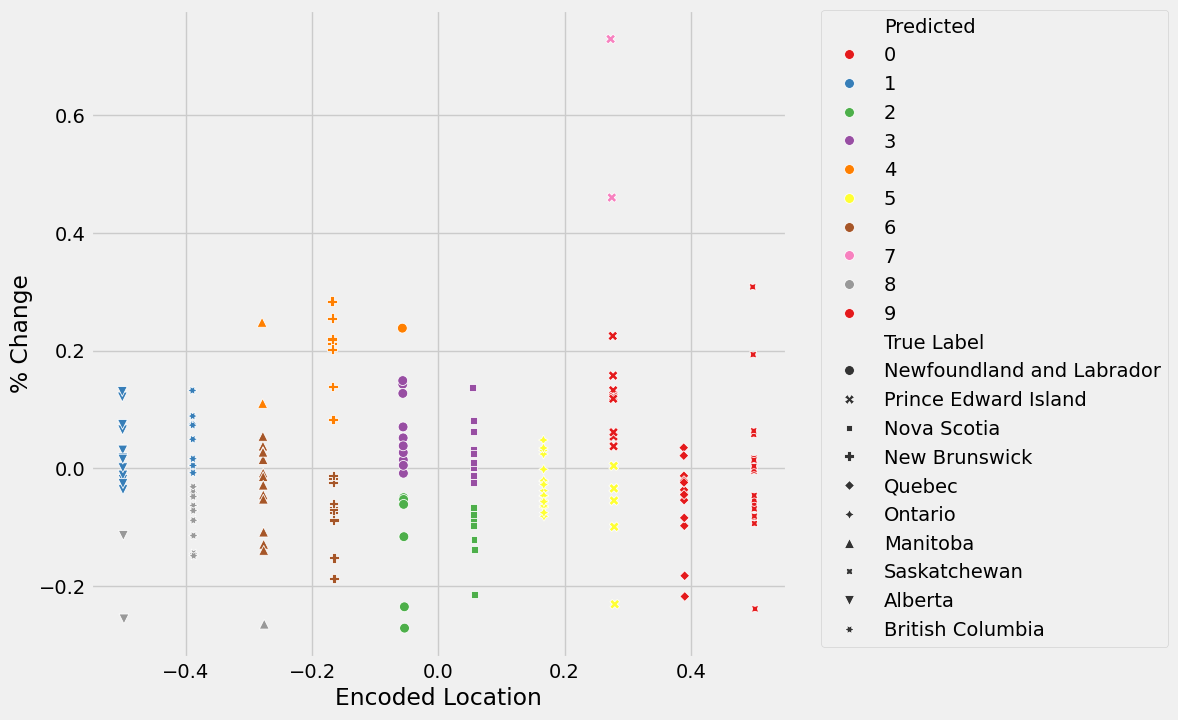

In [20]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
    data = dff,
    x = "Encoded Location",
    y = "% Change",
    s = 50,
    hue = "Predicted",
    style="True Label",
  palette = "Set1"
)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

As we can see from the graph, it's wrong some of the time, but right other times. For example, for the blue stars for British Columbia (above the -0.4 mark) is right. However, the gray marks below them are wrong. We could improve this by having more data to train the model on.

As for what the data means, there are several industries that are facing large decreases in multiple locations. These include the agriculture industry, the utilities industry, and natural resources industry. The locations that are experiencing the largest decrease in these industries are Alberta, Saskatchewan, and Prince Edward Island.




Side Note: This wasn't my original idea for the machine learning section. I wanted to make an algorithm that predicted the percent change in each location for the next year (2025). However, I tried to find previous years data for this part of the project, but I couldn't find the data that fits mine on the statgen website from other years. I feel like if I had this data, I would've been able to make either this algorithm more accurate or make the predictive algorithm which would've been more interesting. So if you are planning on making your own one day, make sure to have a larger data set than I did.

**<h3>Insights and Conclusions</h3>**

The main conclusions that we can draw from this project is that certain industries are experiencing higher unemployment than others. We can see that these industries are the agricultural industry, the utilities industry, and the natural resources industry. Some locations where these industries are in the decline include Saskatchewan, Quebec, Prince Edward Island, and British Columbia. After some additional research, I found that the agriculture sector has been on the decrease for years because farmland is increasing in price and many young folk don't want to become farmers. Around 40% of farmers in Canada will retire by 2033 and they don't have people to take over the farms.

* https://www.cbc.ca/news/canada/saskatchewan/immigrants-needed-labour-shortage-agricultural-sector-canada-1.6810442)


As for both the natural resources industry and utilities industry, employment in this sector is decreasing because the want for crude oil and petroleum has decreased. In other words, the desire for using fossil fuels has shifted over the years, so it's in less of a demand.
*   https://www.cbc.ca/news/canada/calgary/calgary-oil-gas-jobs-statscan-covid-oilwell-drilling-employment-1.5737355#:~:text=Employment%20in%20the%20natural%20resources,Canada%20said%20in%20a%20release.


I also was able to find that Quebec has the overall highest decline in employment in 2023 to 2024 (look at second graph in the Exploratory Analysis Section). Although I don't have a reason why, I can say that Quebec is one of the places that the Agriculture sector experienced a large decrease (-8.1%) along with the Natural Resources sector (-7.6%). This may be because of the reasons listed above.


Overall, we were able to answer the questions of which industries experienced the largest decrease in employment. We were also able to answer which locations experienced the largest decrease in employment. Going further, more research would have to be done to explain why exactly this is happening. If you would like to know more, the links above will provide more insight about specific industries. I hope this project gave you a basic idea about employment in Canada, and it gave you the desire to learn more about it.